In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('/content/banknote.csv')

In [3]:
df.head()

,variance,skew,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skew      1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
features=['variance','skew','curtosis','entropy']
target=['class']

In [7]:
df_norm=df.copy()
sc=StandardScaler()
df_norm[features]=sc.fit_transform(df[features])

In [8]:
tsne=TSNE(learning_rate=500,n_components=2)
x_tsne=tsne.fit_transform(df_norm[features])
y_tsne=df[target]

In [9]:
x_tsne.shape

(1372, 2)

In [10]:
y_tsne.shape

(1372, 1)

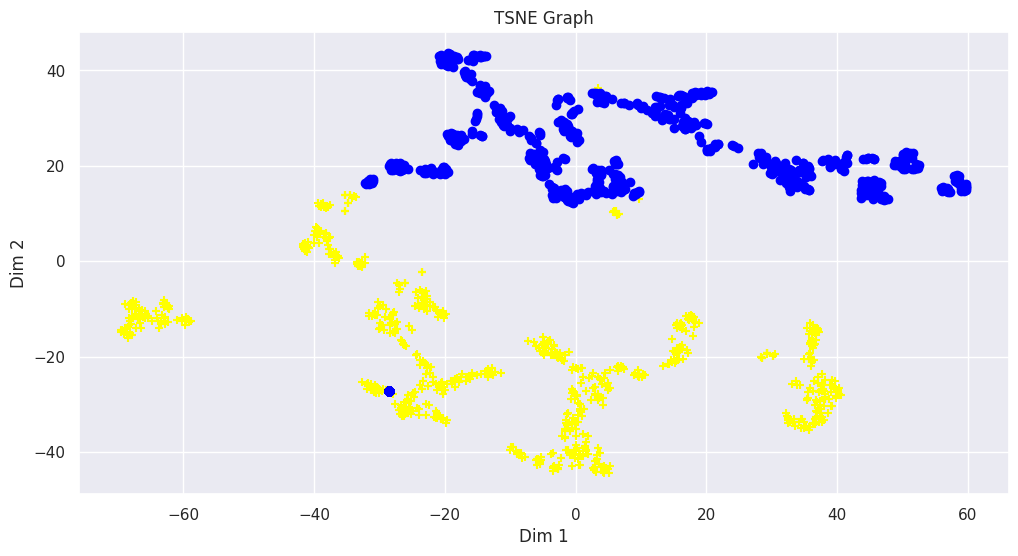

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(x_tsne[np.where(y_tsne==0),0],x_tsne[np.where(y_tsne==0),1],c="yellow",marker='+')
plt.scatter(x_tsne[np.where(y_tsne==1),0],x_tsne[np.where(y_tsne==1),1],c="blue",marker='o')

plt.title("TSNE Graph")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()